In [51]:
import matplotlib

matplotlib.rc("font", size=18, family="serif")
import yt
import numpy as np
import matplotlib.pyplot as plt
from yt.units import mp, keV, kpc
import pyxsim

yt : [INFO     ] 2023-01-30 15:41:00,575 Parameters: current_time              = 1.1835090993823291e+17
yt : [INFO     ] 2023-01-30 15:41:00,576 Parameters: domain_dimensions         = [16 16 16]
yt : [INFO     ] 2023-01-30 15:41:00,576 Parameters: domain_left_edge          = [-3.70272e+24 -3.70272e+24 -3.70272e+24]
yt : [INFO     ] 2023-01-30 15:41:00,578 Parameters: domain_right_edge         = [3.70272e+24 3.70272e+24 3.70272e+24]
yt : [INFO     ] 2023-01-30 15:41:00,583 Parameters: cosmological_simulation   = 0
yt : [INFO     ] 2023-01-30 15:41:01,356 xlim = -1542838790481162406985728.000000 1542838790481162406985728.000000
yt : [INFO     ] 2023-01-30 15:41:01,357 ylim = -1542838790481162406985728.000000 1542838790481162406985728.000000
yt : [INFO     ] 2023-01-30 15:41:01,357 xlim = -1542838790481162406985728.000000 1542838790481162406985728.000000
yt : [INFO     ] 2023-01-30 15:41:01,357 ylim = -1542838790481162406985728.000000 1542838790481162406985728.000000
yt : [INFO     ] 202


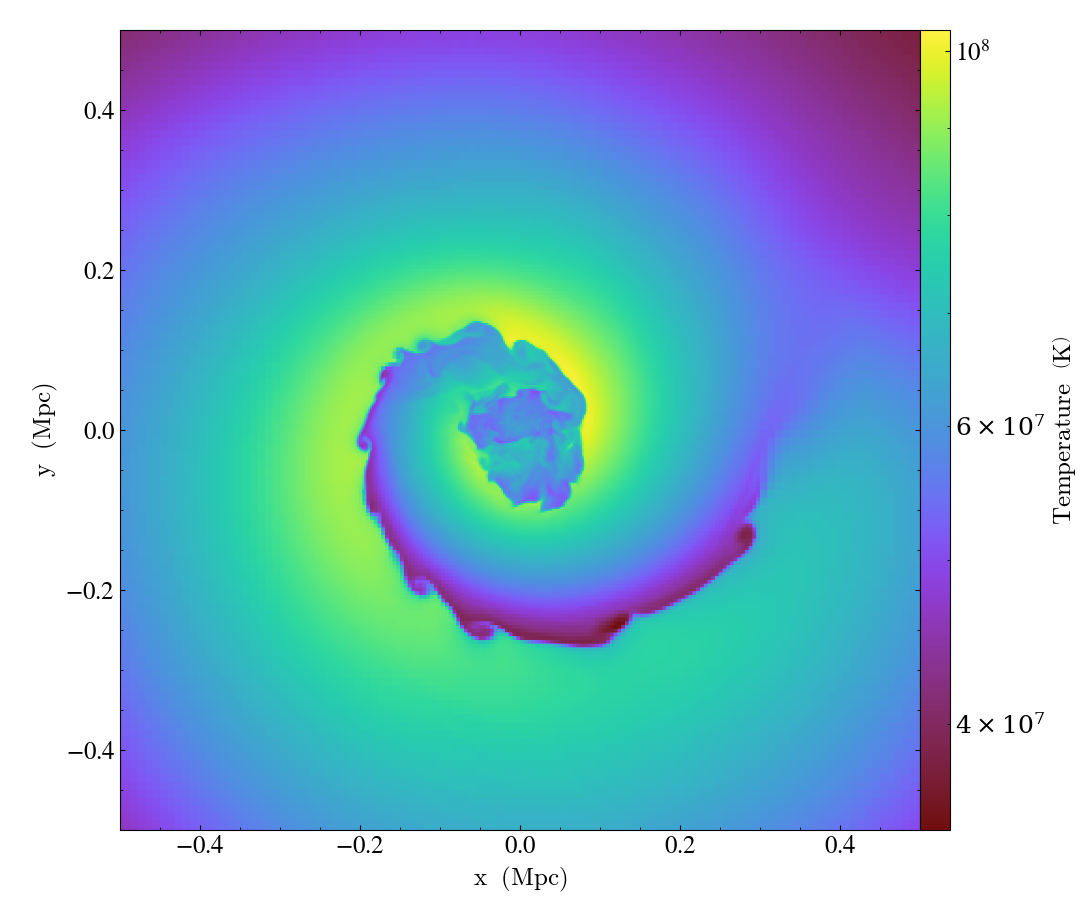
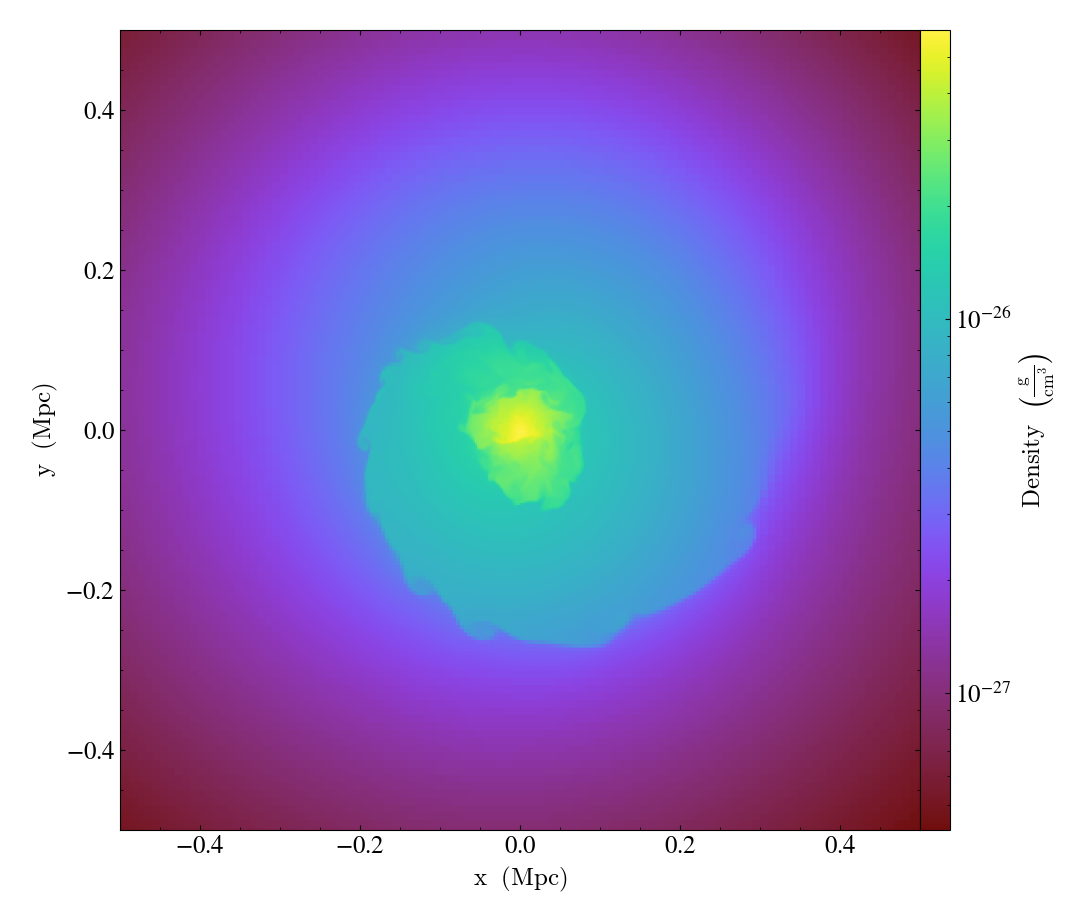

In [52]:
ds = yt.load(
    "GasSloshing/sloshing_nomag2_hdf5_plt_cnt_0150", default_species_fields="ionized"
)
slc = yt.SlicePlot(
    ds, "z", [("gas", "density"), ("gas", "temperature")], width=(1.0, "Mpc")
)
slc.show()

In [53]:
plaw_model = pyxsim.PowerLawSourceModel(1.0, 1, 80.0, "power_law_emission", 1.0)

In [54]:
A = yt.YTQuantity(500.0, "cm**2")
exp_time = yt.YTQuantity(1.0e5, "s")
redshift = 0.03

In [55]:
sp = ds.sphere("c", (0.5, "Mpc"))

In [56]:
norm = yt.YTQuantity(1.0e-19, "photons/s/keV")


def _power_law_emission(field, data):
    return norm * data["cell_mass"] / (1.0 * mp)


ds.add_field(
    ("gas", "power_law_emission"),
    function=_power_law_emission,
    sampling_type="local",
    units="photons/s/keV",
)

In [57]:
npp, npc = pyxsim.make_photons("plaw_photons", sp, redshift, A, exp_time, plaw_model)

pyxsim : [INFO     ] 2023-01-30 15:45:13,610 Cosmology: h = 0.71 100*km/(Mpc*s), omega_matter = 0.27, omega_lambda = 0.73
pyxsim : [INFO     ] 2023-01-30 15:45:17,031 Finished generating photons.
pyxsim : [INFO     ] 2023-01-30 15:45:17,032 Number of photons generated: 276775
pyxsim : [INFO     ] 2023-01-30 15:45:17,032 Number of cells with photons: 258421


In [58]:
xray_fields = plaw_model.make_source_fields(ds, 20.0, 30.0)
print(xray_fields)



[('gas', 'xray_emissivity_20.0_30.0_keV'), ('gas', 'xray_luminosity_20.0_30.0_keV'), ('gas', 'xray_photon_emissivity_20.0_30.0_keV')]


yt : [INFO     ] 2023-01-30 15:51:12,719 Projection completed
yt : [INFO     ] 2023-01-30 15:51:12,720 xlim = -1542838790481162406985728.000000 1542838790481162406985728.000000
yt : [INFO     ] 2023-01-30 15:51:12,720 ylim = -1542838790481162406985728.000000 1542838790481162406985728.000000
yt : [INFO     ] 2023-01-30 15:51:12,721 xlim = -1542838790481162406985728.000000 1542838790481162406985728.000000
yt : [INFO     ] 2023-01-30 15:51:12,722 ylim = -1542838790481162406985728.000000 1542838790481162406985728.000000
yt : [INFO     ] 2023-01-30 15:51:12,723 Making a fixed resolution buffer of (('gas', 'xray_photon_emissivity_20.0_30.0_keV')) 800 by 800



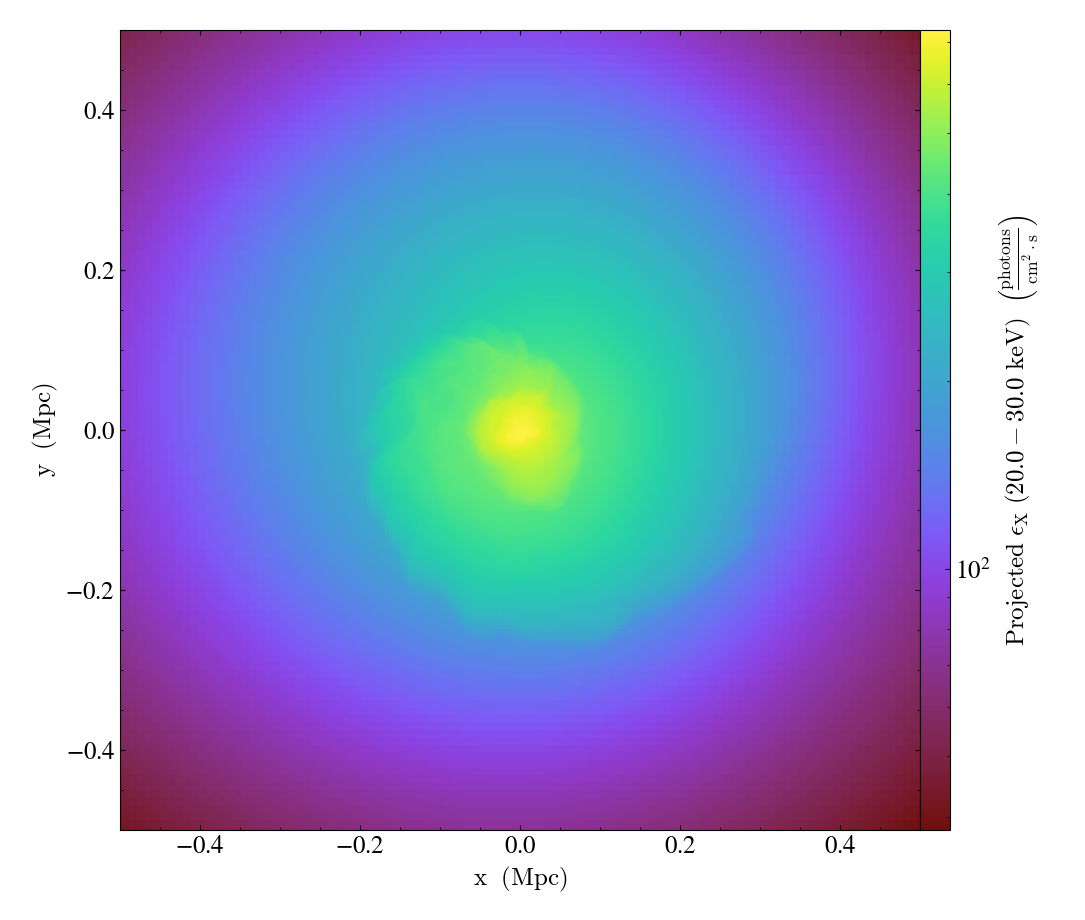

In [60]:
prj = yt.ProjectionPlot(
    ds, "z", ("gas", "xray_photon_emissivity_20.0_30.0_keV"), width=(1.0, "Mpc")
)
prj.show()

In [62]:
xray_fields = plaw_model.make_intensity_fields(ds, 20.0, 30.0, dist=(3, "mpc")) #plaw_model.make_source_fields(ds, 20.0, 30.0)
print(xray_fields)

[('gas', 'xray_intensity_20.0_30.0_keV'), ('gas', 'xray_photon_intensity_20.0_30.0_keV')]


In [65]:
%matplotlib notebook
#import yt
yt.toggle_interactivity()

prj = yt.ProjectionPlot(
    ds, "z", ("gas", "xray_photon_intensity_20.0_30.0_keV"), width=(1.0, "Mpc")
)
prj.show()

Using matplotlib backend: nbAgg


yt : [INFO     ] 2023-01-30 17:01:20,360 Projection completed
yt : [INFO     ] 2023-01-30 17:01:20,361 xlim = -1542838790481162406985728.000000 1542838790481162406985728.000000
yt : [INFO     ] 2023-01-30 17:01:20,361 ylim = -1542838790481162406985728.000000 1542838790481162406985728.000000
yt : [INFO     ] 2023-01-30 17:01:20,362 xlim = -1542838790481162406985728.000000 1542838790481162406985728.000000
yt : [INFO     ] 2023-01-30 17:01:20,362 ylim = -1542838790481162406985728.000000 1542838790481162406985728.000000
yt : [INFO     ] 2023-01-30 17:01:20,363 Making a fixed resolution buffer of (('gas', 'xray_photon_intensity_20.0_30.0_keV')) 800 by 800


<IPython.core.display.Javascript object>

In [2]:
x, y, z = np.mgrid[-R : R : nx * 1j, -R : R : nx * 1j, -R : R : nx * 1j]
r = np.sqrt(x**2 + y**2 + z**2)

NameError: name 'np' is not defined

In [4]:
dens = np.zeros(ddims)
dens[r <= R] = rho_c * (1.0 + (r[r <= R] / r_c) ** 2) ** (-1.5 * beta)
dens[r > R] = 0.0
temp = (kT * keV).to_value("K", "thermal") * np.ones(ddims)

In [6]:
#print(dens.shape)

(256, 256, 256)


In [5]:
data = {}
data["density"] = (dens, "g/cm**3")
data["temperature"] = (temp, "K")
data["velocity_x"] = (np.zeros(ddims), "cm/s")
data["velocity_y"] = (np.zeros(ddims), "cm/s")
data["velocity_z"] = (np.zeros(ddims), "cm/s")

bbox = np.array(
    [[-0.5, 0.5], [-0.5, 0.5], [-0.5, 0.5]]
)  # The bounding box of the domain in code units

L = (2.0 * R * kpc).to_value("cm")

# We have to set default_species_fields="ionized" because
# we didn't create any species fields above
ds = yt.load_uniform_grid(data, ddims, L, bbox=bbox, default_species_fields="ionized")

yt : [INFO     ] 2023-01-30 13:08:42,874 Parameters: current_time              = 0.0
yt : [INFO     ] 2023-01-30 13:08:42,875 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2023-01-30 13:08:42,875 Parameters: domain_left_edge          = [-0.5 -0.5 -0.5]
yt : [INFO     ] 2023-01-30 13:08:42,876 Parameters: domain_right_edge         = [0.5 0.5 0.5]
yt : [INFO     ] 2023-01-30 13:08:42,877 Parameters: cosmological_simulation   = 0


In [7]:
norm = yt.YTQuantity(1.0e-19, "photons/s/keV")


def _power_law_emission(field, data):
    return norm * data["cell_mass"] / (1.0 * mp)


ds.add_field(
    ("gas", "power_law_emission"),
    function=_power_law_emission,
    sampling_type="local",
    units="photons/s/keV",
)

yt : [INFO     ] 2023-01-30 13:38:28,479 xlim = -0.250000 0.250000
yt : [INFO     ] 2023-01-30 13:38:28,479 ylim = -0.250000 0.250000
yt : [INFO     ] 2023-01-30 13:38:28,480 xlim = -0.250000 0.250000
yt : [INFO     ] 2023-01-30 13:38:28,480 ylim = -0.250000 0.250000
yt : [INFO     ] 2023-01-30 13:38:28,481 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



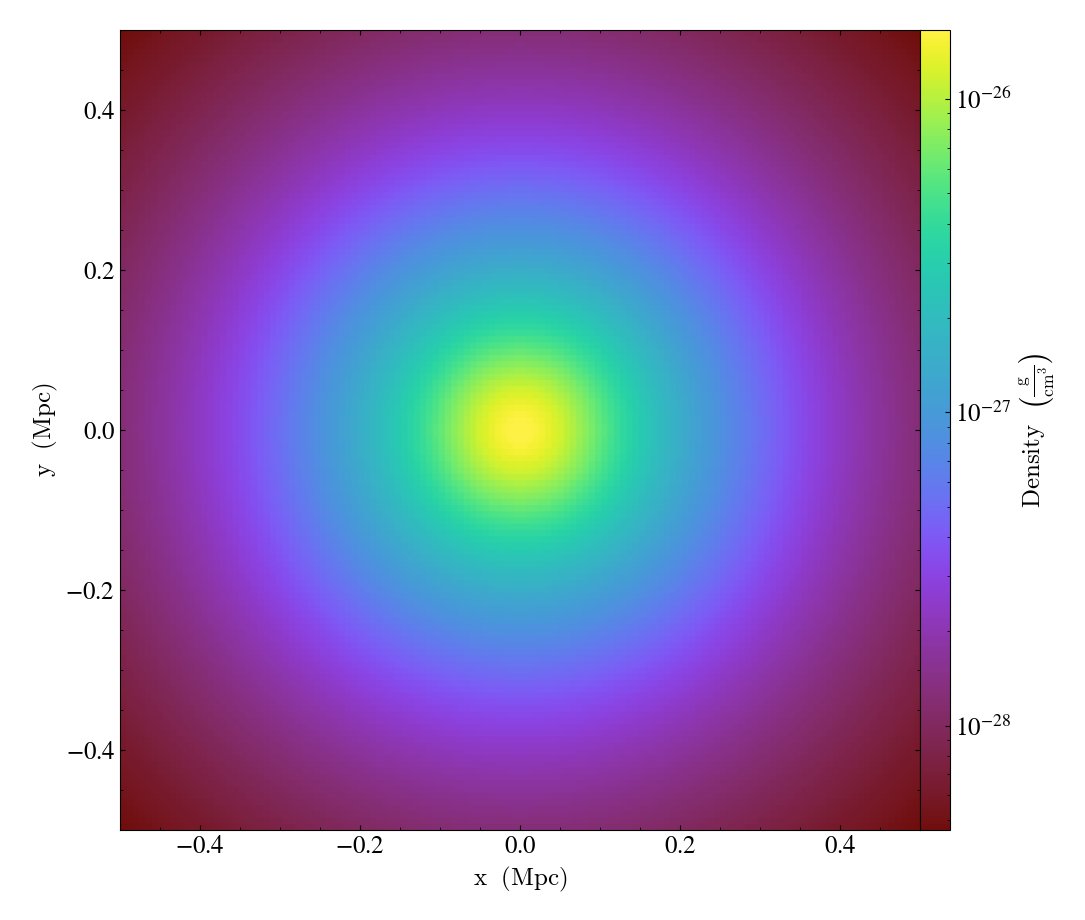

In [25]:
slc = yt.SlicePlot(
    ds, "z", [("gas", "density")], width=(1.0, "Mpc")
)
slc.show()

In [8]:
sp = ds.sphere("c", (0.5, "Mpc"))

In [32]:
A = yt.YTQuantity(500.0, "cm**2")
exp_time = yt.YTQuantity(1.0e5, "s")
redshift = 0.03

In [33]:
therm_model = pyxsim.CIESourceModel("apec", 1, 80.0, 5000, Zmet=0.3)
plaw_model = pyxsim.PowerLawSourceModel(1.0, 1, 80.0, "power_law_emission", 1.0)

pyxsim : [INFO     ] 2023-01-30 14:46:19,513 kT_min = 0.025 keV
pyxsim : [INFO     ] 2023-01-30 14:46:19,514 kT_max = 64.0 keV


In [36]:
xray_fields = plaw_model.make_intensity_fields(ds, 0.5, 64.0, dist=(5, "mpc"))
print(xray_fields)

[('gas', 'xray_intensity_0.5_64.0_keV'), ('gas', 'xray_photon_intensity_0.5_64.0_keV')]


yt : [INFO     ] 2023-01-30 14:48:33,115 xlim = -0.000000 0.000000
yt : [INFO     ] 2023-01-30 14:48:33,115 ylim = -0.000000 0.000000
yt : [INFO     ] 2023-01-30 14:48:33,116 zlim = -0.500000 0.500000
yt : [INFO     ] 2023-01-30 14:48:33,118 Making a fixed resolution buffer of (('gas', 'xray_photon_intensity_0.5_64.0_keV')) 800 by 800
/home/ivan/anaconda3/envs/radcube/lib/python3.9/site-packages/unyt/array.py:1862: RuntimeWarning: invalid value encountered in divide
  out_arr = func(



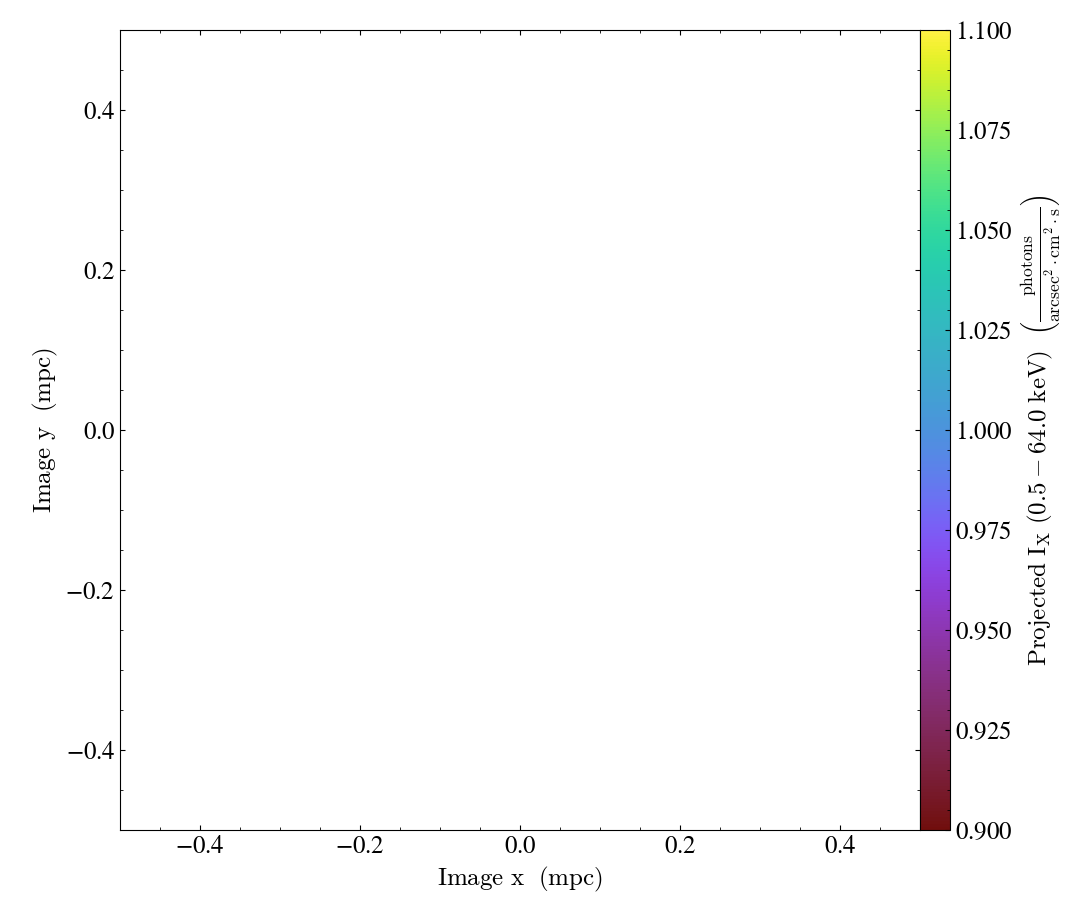

In [38]:
prj = yt.OffAxisProjectionPlot(ds, [0.0, 0.0, 1.0], xray_fields[-1],
                           width=(1, "mpc"), north_vector=[-0.8, 0.6, 0.0])
prj.show()

In [11]:
ntp, ntc = pyxsim.make_photons("therm_photons", sp, redshift, A, exp_time, therm_model)
npp, npc = pyxsim.make_photons("plaw_photons", sp, redshift, A, exp_time, plaw_model)

pyxsim : [INFO     ] 2023-01-30 13:10:36,623 Cosmology: h = 0.71 100*km/(Mpc*s), omega_matter = 0.27, omega_lambda = 0.73
pyxsim : [INFO     ] 2023-01-30 13:10:36,624 Using emission measure field '('gas', 'emission_measure')'.
pyxsim : [INFO     ] 2023-01-30 13:10:36,624 Using temperature field '('gas', 'temperature')'.


Preparing spectrum table :   0%|          | 0/138 [00:00<?, ?it/s]

Processing cells/particles :   0%|          | 0/1099136 [00:00<?, ?it/s]

pyxsim : [INFO     ] 2023-01-30 13:11:52,757 Finished generating photons.
pyxsim : [INFO     ] 2023-01-30 13:11:52,757 Number of photons generated: 336861
pyxsim : [INFO     ] 2023-01-30 13:11:52,758 Number of cells with photons: 93139
pyxsim : [INFO     ] 2023-01-30 13:11:52,765 Cosmology: h = 0.71 100*km/(Mpc*s), omega_matter = 0.27, omega_lambda = 0.73
pyxsim : [INFO     ] 2023-01-30 13:11:53,452 Finished generating photons.
pyxsim : [INFO     ] 2023-01-30 13:11:53,453 Number of photons generated: 54555
pyxsim : [INFO     ] 2023-01-30 13:11:53,453 Number of cells with photons: 49378


In [12]:
nte = pyxsim.project_photons(
    "therm_photons", "therm_events", "x", (30.0, 45.0), absorb_model="wabs", nH=0.02
)
npe = pyxsim.project_photons(
    "plaw_photons", "plaw_events", "x", (30.0, 45.0), absorb_model="wabs", nH=0.02
)

pyxsim : [INFO     ] 2023-01-30 13:13:00,764 Foreground galactic absorption: using the wabs model and nH = 0.02.
Projecting photons from cells/particles: 100%|██████████| 93139/93139 [00:00<00:00, 1282781.94it/s]
pyxsim : [INFO     ] 2023-01-30 13:13:00,847 Detected 331913 events.
pyxsim : [INFO     ] 2023-01-30 13:13:00,848 Foreground galactic absorption: using the wabs model and nH = 0.02.
Projecting photons from cells/particles: 100%|██████████| 49378/49378 [00:00<00:00, 3495170.75it/s]
pyxsim : [INFO     ] 2023-01-30 13:13:00,870 Detected 54319 events.


In [13]:
et = pyxsim.EventList("therm_events.h5")
ep = pyxsim.EventList("plaw_events.h5")
et.write_spectrum("therm_spec.fits", 1, 80.0, 5000, overwrite=True)
ep.write_spectrum("plaw_spec.fits", 1, 80.0, 5000, overwrite=True)

Text(0, 0.5, 'counts/bin')

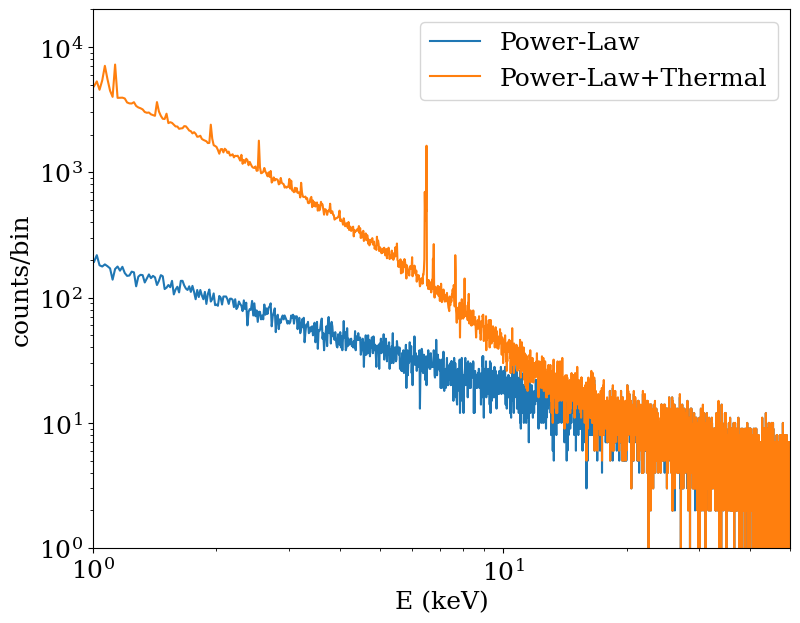

In [14]:
import astropy.io.fits as pyfits

f1 = pyfits.open("therm_spec.fits")
f2 = pyfits.open("plaw_spec.fits")
plt.figure(figsize=(9, 7))
plt.loglog(
    f2["SPECTRUM"].data["ENERGY"], f2["SPECTRUM"].data["COUNTS"], label="Power-Law"
)
plt.loglog(
    f2["SPECTRUM"].data["ENERGY"],
    f1["SPECTRUM"].data["COUNTS"] + f2["SPECTRUM"].data["COUNTS"],
    label="Power-Law+Thermal",
)
plt.xlim(1, 50)
plt.ylim(1, 2.0e4)
plt.legend()
plt.xlabel("E (keV)")
plt.ylabel("counts/bin")